# Mouse embryonic fibroblast reprogramming

In [1]:
import shutup
shutup.please()

import scanpy as sc
from tivelo.main import tivelo
from baseline import run_baseline

(Running UniTVelo 0.2.5.2)
2024-05-17 13:59:56


## Run TIVelo
Load the dataset. Set the data name with key for cluster, key for embedding and cluster edges (for comparison).

In [2]:
data_name = "reprogramming"
data_path = "D:/cuhk/project/velocity/dataset/scRNA-seq/Reprogramming/reprogramming_processed.h5ad"
adata = sc.read(data_path)

group_key = "cluster"
emb_key = "X_tsne"
cluster_edges = [('5', '2'), ('5', '8'), ('2', '7'), ('8', '4'), ('7', '6'), ('4', '9'), ('6', '1'), 
                 ('9', '8'), ('6', '0'), ('8', '0')]

Set the model parameters.

In [3]:
save_folder = "results"
show_fig = True
filter_genes = True
save_coeff = True
constrain = True
loss_fun = "mse"
only_s = False
alpha_1 = 1
alpha_2 = 0.1
batch_size = 1024
n_epochs = 100

tree_gene = None
show_DTI = False
adjust_DTI = False
velocity_key = "velocity"
measure_performance = True

Run the model by function tivelo.

computing velocities
    finished (0:00:09) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 20/20 cores)


  0%|          | 0/32717 [00:00<?, ?cells/s]

    finished (0:01:29) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing terminal states
    identified 4 regions of root cells and 1 region of end points .
    finished (0:00:02) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
'path_dict' added to adata.uns


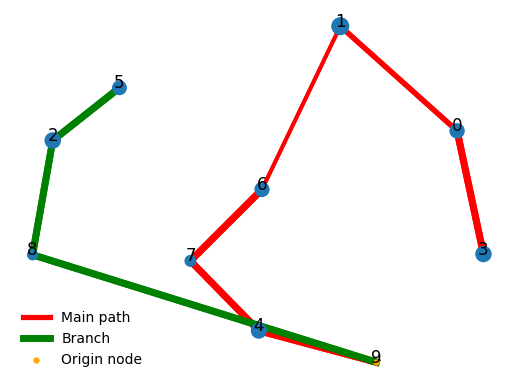


main path: ['9', '4', '7', '6', '1', '0', '3']


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done  73 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 122 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed: 11.3min
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done 181 tasks      | elapsed: 14.1min
[Parallel(n_jobs=-1)]: Done 202 tasks      | elapsed: 15.7min
[Parallel(n_jobs=-1)]: Done 225 tasks      | elapsed: 1

mean: 1.401 
median: 0.742 
lower quantile: -3.230 
upper quantile: 5.361 
minimum: -70.212 
maximum: 115.344 
No. of positive scores: 669

branch_1: ['9', '8', '2', '5']


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   17.5s
[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed:   22.6s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   31.3s
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:   39.0s
[Parallel(n_jobs=-1)]: Done  73 tasks      | elapsed:   47.1s
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:   55.2s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 122 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 181 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 202 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 225 tasks      | elapsed:  

mean: -0.972 
median: -0.516 
lower quantile: -5.517 
upper quantile: 4.122 
minimum: -63.299 
maximum: 93.052 
No. of positive scores: 555

'path_dict' added to adata.uns
'child_dict' added to adata.uns
'level_dict' added to adata.uns
'threshold_list' added to adata.uns
'd_nn' added to adata.obsp


Model training: 100%|██████████| 100/100 [39:44<00:00, 23.85s/it, cos_s=0.387, cos_u=0.52, mse_s=0.003, mse_u=0.01] 


computing velocity graph (using 20/20 cores)


  0%|          | 0/32717 [00:00<?, ?cells/s]

    finished (0:01:32) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:05) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


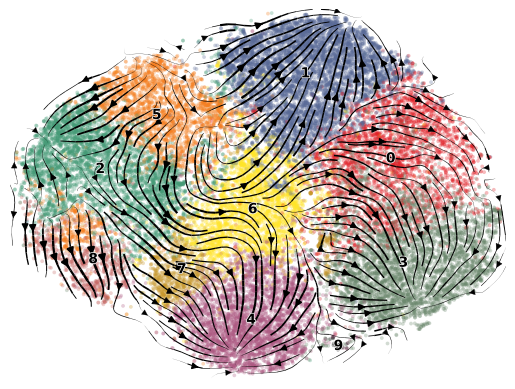

TIVelo:
 CBDir: 0.2462 ICVCoh: 0.4984 
 CBDir2: 0.2568 ICVCoh2: 0.6113 
 TransProbs: 0.3479 VeloCoh: 0.1943


In [4]:
adata_ = tivelo(adata, group_key, emb_key, data_name=data_name, save_folder=save_folder, njobs=-1, tree_gene=tree_gene,
                show_fig=show_fig, filter_genes=filter_genes, constrain=constrain, loss_fun=loss_fun, only_s=only_s,
                alpha_1=alpha_1, alpha_2=alpha_2, batch_size=batch_size, n_epochs=n_epochs, velocity_key="velocity",
                adjust_DTI=adjust_DTI, show_DTI=show_DTI, cluster_edges=cluster_edges,
                measure_performance=measure_performance)

## Run scVelo
Stochastic mode.

computing velocity embedding
    finished (0:00:03) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


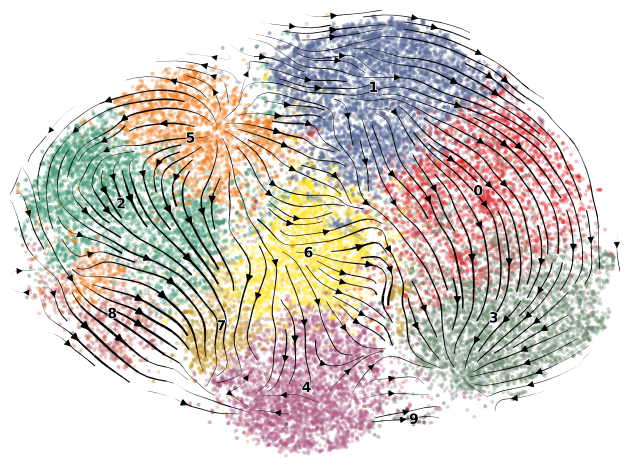

scvelo:
 CBDir: 0.2087 ICVCoh: 0.8237 
 CBDir2: 0.0010 ICVCoh2: 0.6437 
 TransProbs: 0.0763 VeloCoh: 0.0033


In [5]:
adata_scvelo = run_baseline(adata, "scvelo", data_name, group_key, emb_key, cluster_edges, show_fig=True,
                            measure_performance=True)

Dynamical mode.

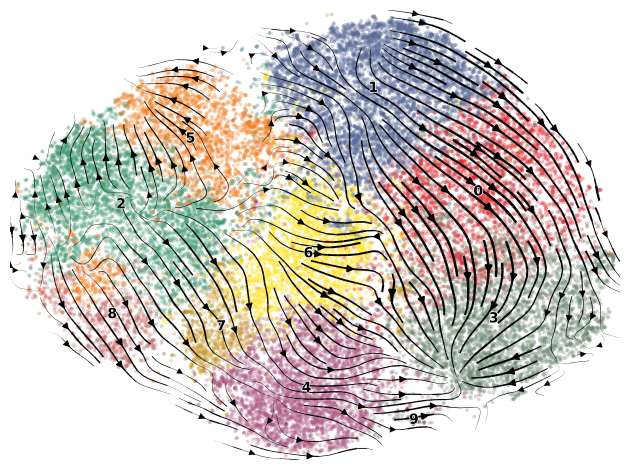

scvelo2:
 CBDir: 0.0548 ICVCoh: 0.9067 
 CBDir2: -0.0402 ICVCoh2: 0.7270 
 TransProbs: 0.1869 VeloCoh: -0.1831


In [6]:
adata_scvelo2 = run_baseline(adata, "scvelo2", data_name, group_key, emb_key, cluster_edges, show_fig=True,
                            measure_performance=True)

## Run veloVI.

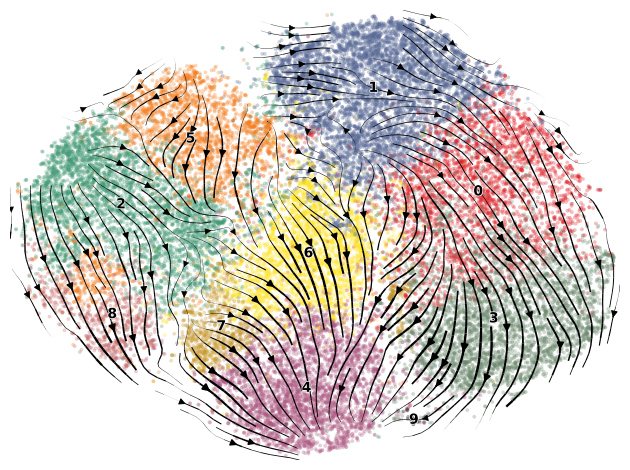

velovi:
 CBDir: 0.1205 ICVCoh: 0.9234 
 CBDir2: 0.0242 ICVCoh2: 0.6804 
 TransProbs: 0.0349 VeloCoh: 0.1655


In [7]:
adata_velovi = run_baseline(adata, "velovi", data_name, group_key, emb_key, cluster_edges, show_fig=True,
                            measure_performance=True)

## Run UniTVelo.

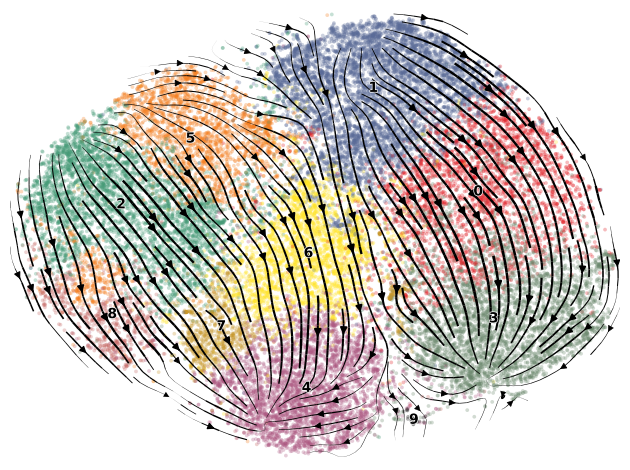

unitvelo:
 CBDir: 0.0691 ICVCoh: 0.9946 
 CBDir2: -0.0541 ICVCoh2: 0.8234 
 TransProbs: 0.1111 VeloCoh: -0.0779


In [8]:
adata_unitvelo = run_baseline(adata, "unitvelo", data_name, group_key, emb_key, cluster_edges, show_fig=True,
                              measure_performance=True)

## Run cellDancer

computing velocity graph (using 20/20 cores)


  0%|          | 0/32717 [00:00<?, ?cells/s]

    finished (0:00:24) --> added 
    'velocity_S_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:02) --> added
    'velocity_S_tsne', embedded velocity vectors (adata.obsm)


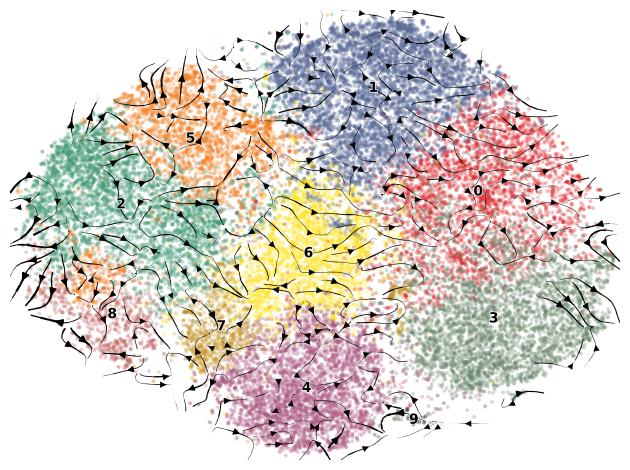

celldancer:
 CBDir: 0.0751 ICVCoh: 0.9208 
 CBDir2: 0.0982 ICVCoh2: 0.4301 
 TransProbs: 0.0001 VeloCoh: -0.0765


In [9]:
adata_celldancer = run_baseline(adata, "celldancer", data_name, group_key, emb_key, cluster_edges, show_fig=True,
                                measure_performance=True)